<a href="https://colab.research.google.com/github/NourhanZahran/Colab-notes/blob/main/Copy_of_SVM%26DTC_FOR_LRRK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("PubChemFP_best.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.head()

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,...,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP836,PubchemFP842,PubchemFP860,PubchemFP863,PubchemFP868
0,1,1,1,1,0,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

1    1732
0     198
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=42,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

1    1732
0     866
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
cv_results = pd.DataFrame(cross_validate(dt,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.078707,0.006386,0.072907,0.073679,0.076288,0.082006,0.091333
score_time,10.0,0.008164,0.000238,0.007964,0.008015,0.008085,0.008207,0.008762
test_SN,10.0,0.927247,0.024081,0.890173,0.909358,0.924855,0.948176,0.959538
test_SP,10.0,0.895656,0.133686,0.604651,0.899258,0.959770,0.976945,0.977011
test_Q,10.0,0.916874,0.048228,0.807692,0.902885,0.934489,0.941287,0.965385
test_MCC,10.0,0.815715,0.115695,0.548883,0.789128,0.860013,0.874630,0.924197


In [ ]:
dt.fit(X_train,y_train)

yHat_train= dt.predict(X_train)

yHat_test = dt.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9913394919168591
0.9942263279445728
0.9827654875078744
0.9923017705927637


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,dt.predict_proba(X_test)[:, 1]))


0.896551724137931
0.5833333333333334
0.4008197528841452
0.865424430641822
0.7471503831417624


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt


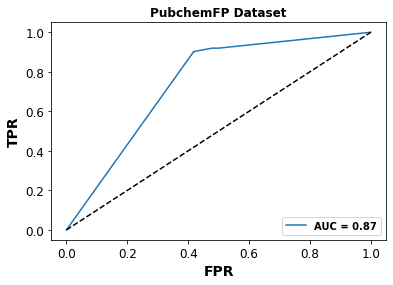

In [ ]:


RocCurveDisplay.from_estimator(dt,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("PubchemFP Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.87"],prop=legend_properties,loc="lower right")

plt.savefig("PubchemFP ROC.tiff",dpi=300)

plt.show()


In [ ]:
### Desicion tree with balance

In [ ]:
dtc = DecisionTreeClassifier(class_weight="balanced",random_state=42)

In [ ]:
cv_results = pd.DataFrame(cross_validate(dt,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.078864,0.006064,0.072349,0.074707,0.077273,0.082883,0.091058
score_time,10.0,0.008522,0.000744,0.008026,0.008111,0.008231,0.008543,0.010466
test_SN,10.0,0.928978,0.021443,0.901734,0.914740,0.921965,0.947977,0.959770
test_SP,10.0,0.894493,0.132837,0.604651,0.902165,0.953756,0.974138,0.977011
test_Q,10.0,0.917642,0.046637,0.807692,0.911538,0.932559,0.937322,0.965385
test_MCC,10.0,0.817126,0.112419,0.548883,0.806531,0.855071,0.865318,0.924197


In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
yHat_train= dt.predict(X_train)

yHat_test = dt.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q


0.9913394919168591
0.9942263279445728
0.9827654875078744
0.9923017705927637


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))


0.8988505747126436
0.5625
0.3897790840773906
0.865424430641822


In [ ]:
from sklearn.metrics import RocCurveDisplay

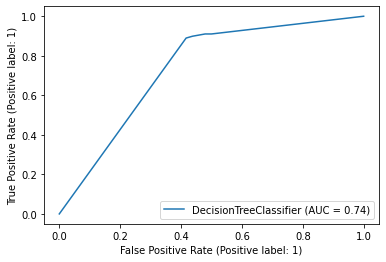

In [ ]:
RocCurveDisplay.from_estimator(dt,X_test,y_test)

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
###svm with smote

In [ ]:
df = pd.read_csv("PubChemFP_best.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.to_csv("Pubchem_features.csv",index=None)

In [ ]:
X.head()

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,...,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP836,PubchemFP842,PubchemFP860,PubchemFP863,PubchemFP868
0,1,1,1,1,0,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

1    1732
0     198
Name: label, dtype: int64

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

1    1732
0     866
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
clf = svm.SVC(kernel='linear',random_state=42)

In [ ]:
cv_results = pd.DataFrame(cross_validate(clf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,1.593164,0.542761,1.034369,1.276048,1.412469,1.583090,2.724029
score_time,10.0,0.097951,0.045417,0.054960,0.067779,0.092291,0.108558,0.210997
test_SN,10.0,0.938788,0.018333,0.913295,0.926400,0.939306,0.952312,0.965517
test_SP,10.0,0.852767,0.191645,0.465116,0.853448,0.942195,0.965417,0.988506
test_Q,10.0,0.910331,0.061467,0.776923,0.907625,0.934482,0.947115,0.961538
test_MCC,10.0,0.796999,0.150013,0.465963,0.792198,0.858430,0.884982,0.915137


In [ ]:
clf.fit(X_train,y_train)

yHat_train= clf.predict(X_train)

yHat_test = clf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9647806004618937
0.9110854503464203
0.8800156709406318
0.9468822170900693


In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9647806004618937
0.9110854503464203
0.8800156709406318
0.9468822170900693


In [ ]:
from sklearn.metrics import RocCurveDisplay

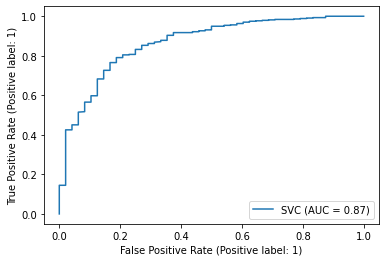

In [ ]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)

In [ ]:
##SVM with balance

In [ ]:
df = pd.read_csv("PubChemFP_best.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate

from sklearn import svm

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
clf = svm.SVC(kernel='linear',class_weight="balanced",random_state=42)

In [ ]:
cv_results = pd.DataFrame(cross_validate(clf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.706259,0.341431,0.378450,0.443072,0.552125,0.894561,1.349461
score_time,10.0,0.043920,0.020206,0.031408,0.032381,0.038076,0.045100,0.098854
test_SN,10.0,0.847575,0.038133,0.786127,0.822254,0.846821,0.871387,0.913295
test_SP,10.0,0.554737,0.141925,0.315789,0.500000,0.525000,0.611184,0.800000
test_Q,10.0,0.817617,0.033472,0.756477,0.797927,0.821244,0.834197,0.865285
test_MCC,10.0,0.310490,0.099204,0.167561,0.249431,0.311719,0.335070,0.506297


In [ ]:
clf.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
yHat_train= clf.predict(X_train)

yHat_test = clf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q


0.8810623556581986
0.9848484848484849
0.6475954468791898
0.8917098445595855


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))


0.8551724137931035
0.6458333333333334
0.3785900776328756
0.8343685300207039


In [ ]:
from sklearn.metrics import RocCurveDisplay

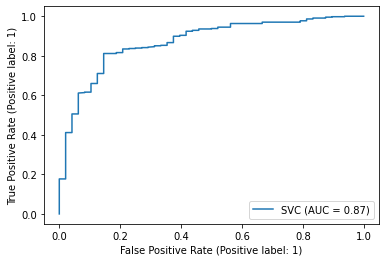

In [ ]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)